In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("list_oralmicrobiomepapers.txt", sep="\t", header=None)

##The text files above was obtained from a script i used in linux environment, with Entrez Direct, similar to this one:
esearch -db pubmed -query "microbiome" | efetch -format docsum | xtract -pattern DocumentSummary -element Title SortFirstAuthor PubDate  > list.txt

In [20]:
df.head()

,0,1,2
0,"Oral nanomedicine for modulating immunity, int...",Moon JJ,2021 Oct 25
1,A potential pathogenic association between per...,Kamada N,2021 Oct 28
2,One Health Implications of Antimicrobial Resis...,de Souza Collares Maia Castelo-Branco D,2021 Oct 28
3,Oral Pathobiont-Induced Changes in Gut Microbi...,Yamazaki K,2021
4,Uncovering the Oral Dysbiotic Microbiota as Ma...,Sochalska M,2021


In [21]:
df.columns = ["title", "last_author", "date"]
df.tail()

,title,last_author,date
9696,The microbiota of the gingival crevice area of...,MACDONALD JB,1963 May-Jun
9697,The microbiota of the gingival crevice area of...,MACDONALD JB,1963 May-Jun
9698,Interactions of the oral microbiota. I. A syst...,SNYDER ML,1961 Dec
9699,Application of newer methods to study the impo...,SHANKLE RJ,1961 Sep
9700,Inhibition of a collagenase by the human gingi...,SCHERP HW,1958 Oct


In [22]:
def get_year(address):
    return address.split(" ")[0].strip(" ")
df['year'] = df['date'].apply(lambda x: f"{get_year(str(x))}")
df.head()

,title,last_author,date,year
0,"Oral nanomedicine for modulating immunity, int...",Moon JJ,2021 Oct 25,2021
1,A potential pathogenic association between per...,Kamada N,2021 Oct 28,2021
2,One Health Implications of Antimicrobial Resis...,de Souza Collares Maia Castelo-Branco D,2021 Oct 28,2021
3,Oral Pathobiont-Induced Changes in Gut Microbi...,Yamazaki K,2021,2021
4,Uncovering the Oral Dysbiotic Microbiota as Ma...,Sochalska M,2021,2021


In [23]:
df['count'] = 1
df.tail()
#paper_count = df.groupby(['year']).count()
#paper_count.head()

,title,last_author,date,year,count
9696,The microbiota of the gingival crevice area of...,MACDONALD JB,1963 May-Jun,1963,1
9697,The microbiota of the gingival crevice area of...,MACDONALD JB,1963 May-Jun,1963,1
9698,Interactions of the oral microbiota. I. A syst...,SNYDER ML,1961 Dec,1961,1
9699,Application of newer methods to study the impo...,SHANKLE RJ,1961 Sep,1961,1
9700,Inhibition of a collagenase by the human gingi...,SCHERP HW,1958 Oct,1958,1


In [24]:
paper_count = df[["year", "count"]]
paper_count.head()

,year,count
0,2021,1
1,2021,1
2,2021,1
3,2021,1
4,2021,1


In [25]:
paper_count = paper_count.groupby(['year']).count().dropna()
#paper_count.dropna()
paper_count.tail()

,count
year,
2018,996
2019,1292
2020,1639
2021,1829
nan,14


In [26]:
#drop the last row that has nan

paper_count = paper_count[:-1]
paper_count.tail(20)

,count
year,
2002,33
2003,34
2004,40
2005,40
2006,45
2007,56
2008,73
2009,92
2010,119


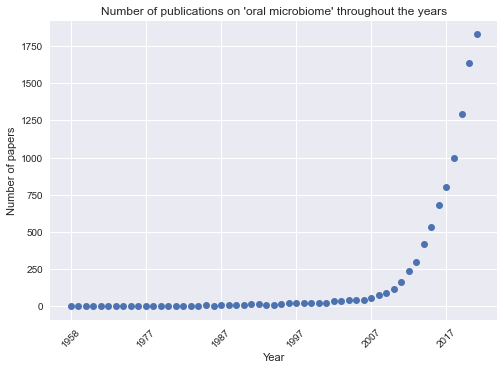

In [27]:

paper_count.plot(style='o', legend=False)
plt.style.use('seaborn')
plt.ylabel('Number of papers')
plt.xlabel('Year')
#plt.xlim(1958, 2)
plt.title("Number of publications on 'oral microbiome' throughout the years")
plt.xticks(rotation=90)
plt.show()